ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿ≥ÿßÿ≠ÿ™ Ÿà ÿØÿ±ÿµÿØ ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ

In [14]:
import rasterio
import numpy as np
import pandas as pd
import os

# ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ŸÖÿ≥€åÿ± Ÿà ÿØÿßÿØŸá‚ÄåŸáÿß
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [1990, 2000, 2009, 2020, 2024]
classes = [0, 1, 2, 3]
class_names = ["Urban", "Agriculture", "water", "Vegetation"]
pixel_area_km2 = (30 * 30) / 1e6  # 0.0009 km¬≤ ÿ®ÿ±ÿß€å Ÿáÿ± Ÿæ€å⁄©ÿ≥ŸÑ

# ŸÜÿ™ÿß€åÿ¨ ŸÜŸáÿß€å€å
all_stats = []

for year in years:
    file_path = os.path.join(base_path, f"classified{year}.tif")

    with rasterio.open(file_path) as src:
        raster = src.read(1)
        nodata = src.nodata

    valid_pixels = raster[raster != nodata]
    total_pixels = len(valid_pixels)
    total_area = total_pixels * pixel_area_km2

    stats = {"Year": year}
    for cls, name in zip(classes, class_names):
        count = np.sum(valid_pixels == cls)
        area = count * pixel_area_km2
        percent = (area / total_area) * 100
        stats[f"{name}_Area_km2"] = round(area, 2)
        stats[f"{name}_Percent"] = round(percent, 2)

    all_stats.append(stats)

# ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá DataFrame Ÿà ŸÜŸÖÿß€åÿ¥
df = pd.DataFrame(all_stats)
print("\nüìä ŸÖÿ≥ÿßÿ≠ÿ™ Ÿà ÿØÿ±ÿµÿØ ŸæŸàÿ¥ÿ¥/⁄©ÿßÿ±ÿ®ÿ±€å ÿ≤ŸÖ€åŸÜ ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ:\n")
print(df.to_string(index=False))



üìä ŸÖÿ≥ÿßÿ≠ÿ™ Ÿà ÿØÿ±ÿµÿØ ŸæŸàÿ¥ÿ¥/⁄©ÿßÿ±ÿ®ÿ±€å ÿ≤ŸÖ€åŸÜ ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿßŸÑ:

 Year  Urban_Area_km2  Urban_Percent  Agriculture_Area_km2  Agriculture_Percent  water_Area_km2  water_Percent  Vegetation_Area_km2  Vegetation_Percent
 1990          982.67          87.82                 73.38                 6.56            4.63           0.41                58.24                5.20
 2000          982.90          87.85                 79.43                 7.10           41.06           3.67                15.51                1.39
 2009          924.80          82.65                157.76                14.10           11.04           0.99                25.31                2.26
 2020          971.26          86.80                116.38                10.40           12.41           1.11                18.86                1.69
 2024          939.27          83.95                156.68                14.00            6.58           0.59                16.37                1.46



üìÖ Year: 1990
Confusion Matrix:
 [[13  0  0  0]
 [12  5  0  2]
 [ 0  1  5  2]
 [ 0  5  5  8]]
Overall Accuracy: 0.534
Kappa Coefficient: 0.382
Class 0 ‚Üí User's Acc: 0.52, Producer's Acc: 1.00
Class 1 ‚Üí User's Acc: 0.45, Producer's Acc: 0.26
Class 2 ‚Üí User's Acc: 0.50, Producer's Acc: 0.62
Class 3 ‚Üí User's Acc: 0.67, Producer's Acc: 0.44


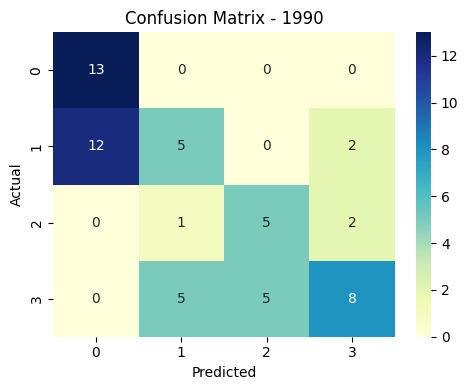


üìÖ Year: 2000
Confusion Matrix:
 [[35  0  4  0]
 [ 0 14  1  3]
 [ 0  0 11  4]
 [ 0  0  1 14]]
Overall Accuracy: 0.851
Kappa Coefficient: 0.790
Class 0 ‚Üí User's Acc: 1.00, Producer's Acc: 0.90
Class 1 ‚Üí User's Acc: 1.00, Producer's Acc: 0.78
Class 2 ‚Üí User's Acc: 0.65, Producer's Acc: 0.73
Class 3 ‚Üí User's Acc: 0.67, Producer's Acc: 0.93


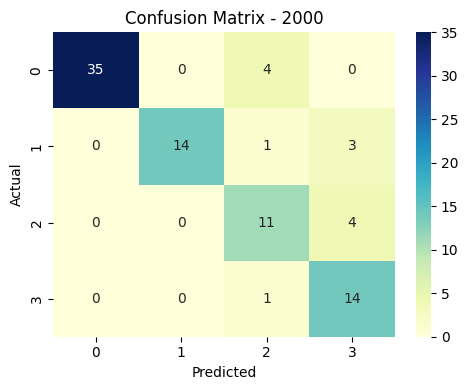


üìÖ Year: 2010
Confusion Matrix:
 [[26  1  0  0]
 [ 0 16  0  4]
 [ 0  0  7  2]
 [ 0  4  1 10]]
Overall Accuracy: 0.831
Kappa Coefficient: 0.764
Class 0 ‚Üí User's Acc: 1.00, Producer's Acc: 0.96
Class 1 ‚Üí User's Acc: 0.76, Producer's Acc: 0.80
Class 2 ‚Üí User's Acc: 0.88, Producer's Acc: 0.78
Class 3 ‚Üí User's Acc: 0.62, Producer's Acc: 0.67


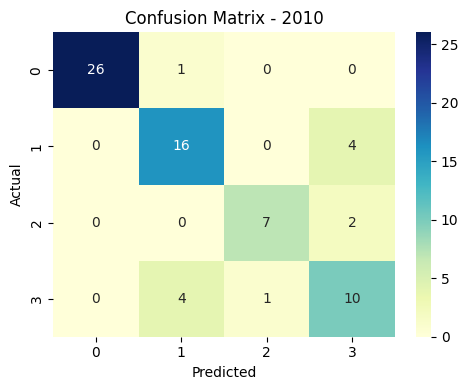


üìÖ Year: 2020
Confusion Matrix:
 [[29  0  0  1]
 [ 0 18  2  3]
 [ 0  2  5  4]
 [ 0  1  0 14]]
Overall Accuracy: 0.835
Kappa Coefficient: 0.771
Class 0 ‚Üí User's Acc: 1.00, Producer's Acc: 0.97
Class 1 ‚Üí User's Acc: 0.86, Producer's Acc: 0.78
Class 2 ‚Üí User's Acc: 0.71, Producer's Acc: 0.45
Class 3 ‚Üí User's Acc: 0.64, Producer's Acc: 0.93


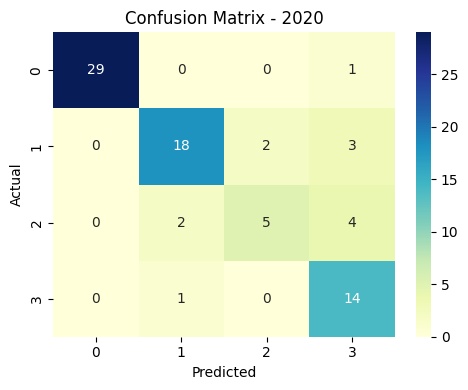


üìÖ Year: 2024
Confusion Matrix:
 [[29  3  0  0]
 [ 0 26  2  1]
 [ 0  1  9  2]
 [ 0  0  1 12]]
Overall Accuracy: 0.884
Kappa Coefficient: 0.836
Class 0 ‚Üí User's Acc: 1.00, Producer's Acc: 0.91
Class 1 ‚Üí User's Acc: 0.87, Producer's Acc: 0.90
Class 2 ‚Üí User's Acc: 0.75, Producer's Acc: 0.75
Class 3 ‚Üí User's Acc: 0.80, Producer's Acc: 0.92


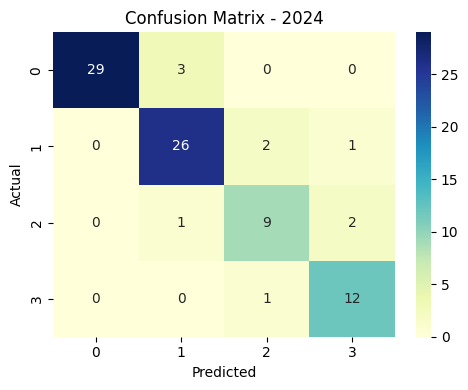

In [2]:
import geopandas as gpd
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ÿ™ÿπÿ±€åŸÅ ÿ™ÿßÿ®ÿπ ÿßÿ±ÿ≤€åÿßÿ®€å
def evaluate_classification(shapefile_path, year, class_labels):
    gdf = gpd.read_file(shapefile_path)

    if 'class' not in gdf.columns or 'RASTERVALU' not in gdf.columns:
        print(f"‚õî ŸÅÿß€åŸÑ {shapefile_path} ŸÅÿßŸÇÿØ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ŸÖŸàÿ±ÿØ ŸÜ€åÿßÿ≤ ÿßÿ≥ÿ™.")
        return None
    
    df = gdf[['class', 'RASTERVALU']].copy()
    df.columns = ['true', 'pred']

    cm = confusion_matrix(df['true'], df['pred'], labels=class_labels)
    overall_acc = accuracy_score(df['true'], df['pred'])
    kappa = cohen_kappa_score(df['true'], df['pred'])
    user_acc = np.diag(cm) / np.sum(cm, axis=0)
    producer_acc = np.diag(cm) / np.sum(cm, axis=1)

    print(f"\nüìÖ Year: {year}")
    print("Confusion Matrix:\n", cm)
    print(f"Overall Accuracy: {overall_acc:.3f}")
    print(f"Kappa Coefficient: {kappa:.3f}")

    for i, label in enumerate(class_labels):
        print(f"Class {label} ‚Üí User's Acc: {user_acc[i]:.2f}, Producer's Acc: {producer_acc[i]:.2f}")

    # ÿ±ÿ≥ŸÖ Confusion Matrix
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    plt.figure(figsize=(5, 4))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix - {year}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ŸÖÿ≥€åÿ± ŸæŸàÿ¥Ÿá ÿßÿµŸÑ€å
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\Extractions"

# ÿ≥ÿßŸÑ‚ÄåŸáÿß Ÿà ŸÜÿßŸÖ ŸÅÿß€åŸÑ‚ÄåŸáÿß
year_files = {
    1990: "Extract1990.shp",
    2000: "Extract2000.shp",
    2010: "Extract2010.shp",
    2020: "Extraction2020.shp",
    2024: "Extraction2024.shp"
}

# ŸÑ€åÿ≥ÿ™ ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß (ÿ™ÿ∫€å€åÿ± ÿ®ÿØŸá ÿß⁄Øÿ± ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å ÿ®€åÿ¥ÿ™ÿ±€å ÿØÿßÿ±€å)
class_labels = [0, 1, 2, 3]

# ÿßÿ¨ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ ÿ®ÿ±ÿß€å ŸáŸÖŸá ÿ≥ÿßŸÑ‚ÄåŸáÿß
for year, filename in year_files.items():
    shp_path = os.path.join(base_path, filename)
    evaluate_classification(shp_path, year, class_labels)



üìä Confusion Matrix:
[[969315  64312   3373   6630]
 [120594  40628   5868   7002]
 [  2892   1843   1525   1056]
 [  6957   6288   1685   3257]]

‚úÖ Overall Accuracy: 0.816
‚úÖ Kappa Coefficient: 0.248


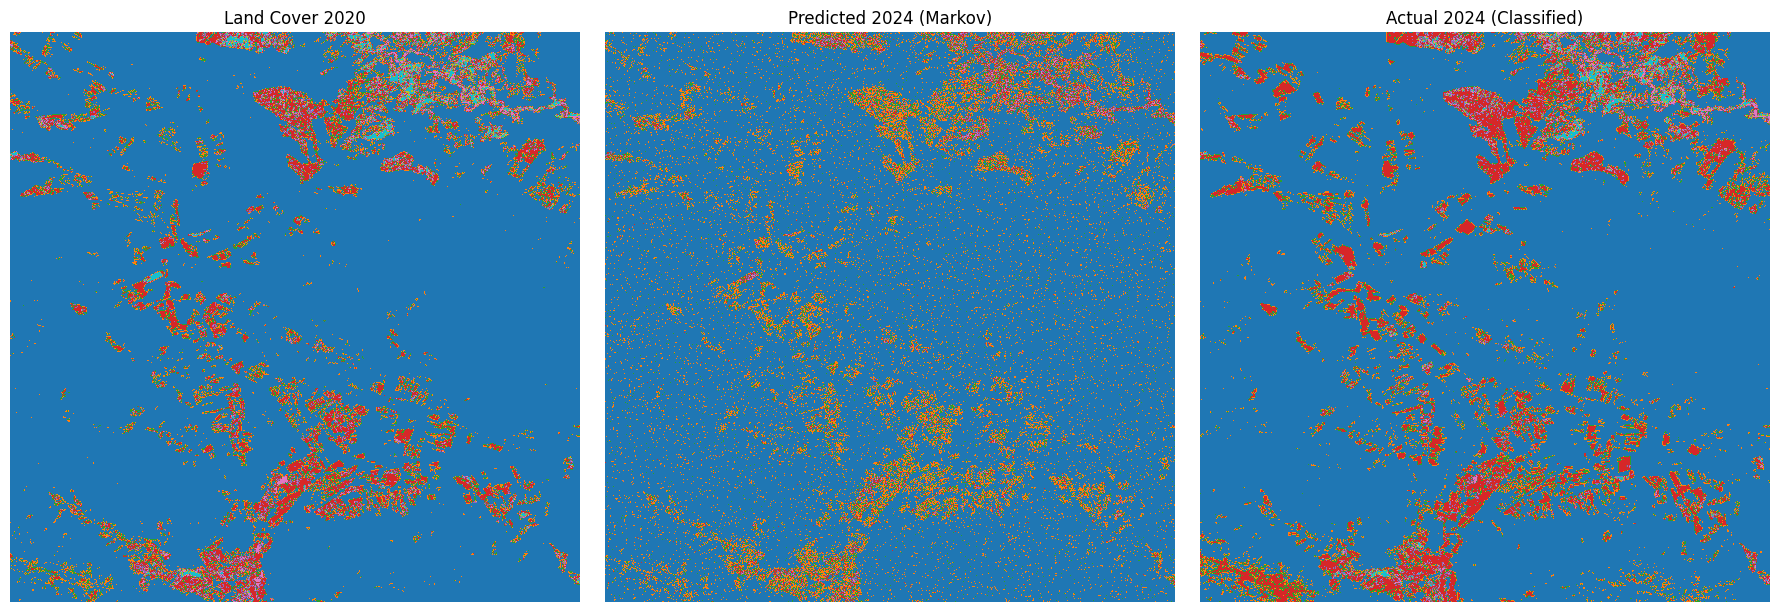

In [19]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
import os

# ŸÖÿ≥€åÿ± ŸÅÿß€åŸÑ‚ÄåŸáÿß
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
r2009 = os.path.join(base_path, "classified2009.tif")
r2020 = os.path.join(base_path, "classified2020.tif")
r2024 = os.path.join(base_path, "classified2024.tif")  # ŸÜŸÇÿ¥Ÿá ŸàÿßŸÇÿπ€å ÿ®ÿ±ÿß€å ŸÖŸÇÿß€åÿ≥Ÿá
classes = [0, 1, 2, 3]

# ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿ±ÿ≥ÿ™ÿ±Ÿáÿß
with rasterio.open(r2009) as src1:
    data_2009 = src1.read(1)
    nodata_2009 = src1.nodata

with rasterio.open(r2020) as src2:
    data_2020 = src2.read(1)
    nodata_2020 = src2.nodata
    meta = src2.meta.copy()  # ÿ®ÿ±ÿß€å ÿ∞ÿÆ€åÿ±Ÿá ŸÜŸÇÿ¥Ÿá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚Äåÿ¥ÿØŸá

with rasterio.open(r2024) as src3:
    data_2024 = src3.read(1)
    nodata_2024 = src3.nodata

# ÿ≥ÿßÿÆÿ™ ŸÖÿßÿ™ÿ±€åÿ≥ ⁄Øÿ∞ÿßÿ± ŸÖÿßÿ±⁄©ŸàŸÅ
mask = (data_2009 != nodata_2009) & (data_2020 != nodata_2020)
early = data_2009[mask].flatten()
late = data_2020[mask].flatten()

trans_matrix = confusion_matrix(early, late, labels=classes)
trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÜŸÇÿ¥Ÿá 2024 ÿ®ÿ± Ÿæÿß€åŸá ŸÜŸÇÿ¥Ÿá 2020
np.random.seed(42)
rows, cols = data_2020.shape
predicted_2024 = np.zeros_like(data_2020, dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        c = data_2020[i, j]
        if c in classes:
            predicted_2024[i, j] = np.random.choice(classes, p=trans_prob[c])
        else:
            predicted_2024[i, j] = 255  # nodata

# ÿ∞ÿÆ€åÿ±Ÿá ŸÜŸÇÿ¥Ÿá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚Äåÿ¥ÿØŸá
out_path = os.path.join(base_path, "predicted2024.tif")
meta.update({"dtype": "uint8", "count": 1})
with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(predicted_2024, 1)

# ŸÖŸÇÿß€åÿ≥Ÿá ÿ®ÿß ŸÜŸÇÿ¥Ÿá ŸàÿßŸÇÿπ€å 2024
mask_compare = (predicted_2024 != 255) & (data_2024 != nodata_2024)
true = data_2024[mask_compare].flatten()
pred = predicted_2024[mask_compare].flatten()

cm = confusion_matrix(true, pred, labels=classes)
acc = accuracy_score(true, pred)
kappa = cohen_kappa_score(true, pred)

print("\nüìä Confusion Matrix:")
print(cm)
print(f"\n‚úÖ Overall Accuracy: {acc:.3f}")
print(f"‚úÖ Kappa Coefficient: {kappa:.3f}")

# ŸÜŸÖÿß€åÿ¥ ŸÜŸÇÿ¥Ÿá‚ÄåŸáÿß
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(data_2020, cmap="tab10")
axs[0].set_title("Land Cover 2020")
axs[0].axis("off")

axs[1].imshow(predicted_2024, cmap="tab10")
axs[1].set_title("Predicted 2024 (Markov)")
axs[1].axis("off")

axs[2].imshow(data_2024, cmap="tab10")
axs[2].set_title("Actual 2024 (Classified)")
axs[2].axis("off")

plt.tight_layout()
plt.show()


üìä Transition Count Matrix:
 [[3982339  258919   31104   18326]
 [ 189505  243174   15617   26089]
 [  27231   21970   18832    8787]
 [  43392   42886   13444   31285]]

üìà Transition Probability Matrix (Markov):
 [[0.928 0.06  0.007 0.004]
 [0.399 0.513 0.033 0.055]
 [0.354 0.286 0.245 0.114]
 [0.331 0.327 0.103 0.239]]

üìÖ Predicted Class Distribution for 2030:
Class 0 ‚Üí 0.842 (84.2%)
Class 1 ‚Üí 0.129 (12.9%)
Class 2 ‚Üí 0.014 (1.4%)
Class 3 ‚Üí 0.015 (1.5%)


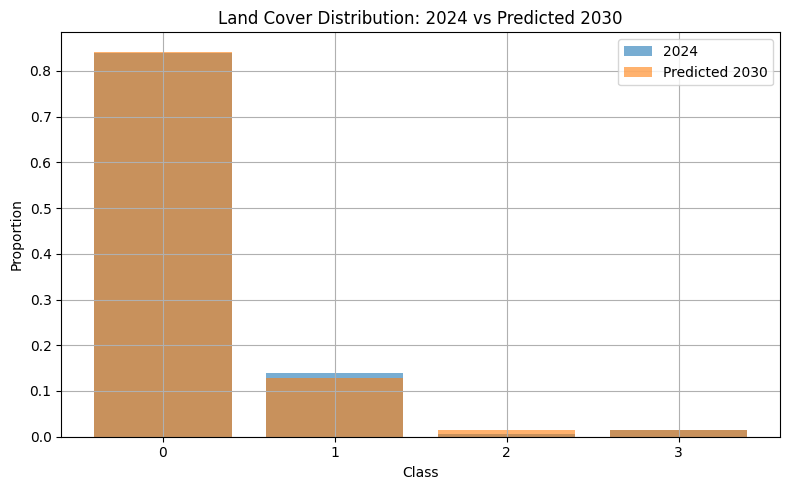

In [7]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

# ---------------------------
# 1. ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿ±ÿ≥ÿ™ÿ±Ÿáÿß€å 5 ÿ≥ÿßŸÑ
# ---------------------------
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [1990, 2000, 2009, 2020, 2024]
classes = [0, 1, 2, 3]

rasters = {}
nodatas = {}

for year in years:
    file_path = os.path.join(base_path, f"classfied{year}.tif")
    with rasterio.open(file_path) as src:
        rasters[year] = src.read(1)
        nodatas[year] = src.nodata

# ---------------------------
# 2. ÿ¨ŸÖÿπ‚Äåÿ¢Ÿàÿ±€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ≥ÿßÿÆÿ™ ŸÖÿßÿ™ÿ±€åÿ≥ ⁄Øÿ∞ÿßÿ±
# ---------------------------
all_early = []
all_late = []

for i in range(len(years) - 1):
    early = rasters[years[i]]
    late = rasters[years[i + 1]]
    mask = (early != nodatas[years[i]]) & (late != nodatas[years[i + 1]])
    all_early.extend(early[mask].flatten())
    all_late.extend(late[mask].flatten())

# ---------------------------
# 3. ÿ≥ÿßÿÆÿ™ ŸÖÿßÿ™ÿ±€åÿ≥ ⁄Øÿ∞ÿßÿ± ŸÖÿßÿ±⁄©ŸàŸÅ
# ---------------------------
trans_matrix = confusion_matrix(all_early, all_late, labels=classes)
print("üìä Transition Count Matrix:\n", trans_matrix)

trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)
print("\nüìà Transition Probability Matrix (Markov):\n", np.round(trans_prob, 3))

# ---------------------------
# 4. ÿ®ÿ±ÿØÿßÿ± ÿ™Ÿàÿ≤€åÿπ ÿ≥ÿßŸÑ ÿ¢ÿÆÿ± (2024)
# ---------------------------
latest = rasters[2024]
latest_flat = latest.flatten()
unique, counts = np.unique(latest_flat, return_counts=True)
current_vector = np.zeros(len(classes))

for i, cls in enumerate(classes):
    current_vector[i] = counts[unique.tolist().index(cls)] if cls in unique else 0

current_vector = current_vector / current_vector.sum()

# ---------------------------
# 5. Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ™Ÿàÿ≤€åÿπ ÿØÿ± ÿ≥ÿßŸÑ 2030
# ---------------------------
future_vector = np.dot(current_vector, trans_prob)

print("\nüìÖ Predicted Class Distribution for 2030:")
for i, prob in enumerate(future_vector):
    print(f"Class {classes[i]} ‚Üí {prob:.3f} ({(prob * 100):.1f}%)")

# ---------------------------
# 6. ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ŸÖŸÇÿß€åÿ≥Ÿá‚Äåÿß€å
# ---------------------------
plt.figure(figsize=(8, 5))
x = [str(c) for c in classes]
plt.bar(x, current_vector, alpha=0.6, label="2024")
plt.bar(x, future_vector, alpha=0.6, label="Predicted 2030")
plt.title("Land Cover Distribution: 2024 vs Predicted 2030")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÜŸÇÿ¥Ÿá 2030 + ÿ™ÿ≠ŸÑ€åŸÑ ÿ™ÿ∫€å€åÿ±ÿßÿ™ ŸÜÿ≥ÿ®ÿ™ ÿ®Ÿá 2024


üìä Change Statistics:

         Class  Pixels_2024  Pixels_2030  Change (%)
0        Urban      1043630      1046416    0.266953
1   Vegetation       174092       160945   -7.551754
2  Agriculture         7316        16660  127.720066
3       Forest        18187        19204    5.591906

üåÄ Total changed pixels: 179390 (14.43%)


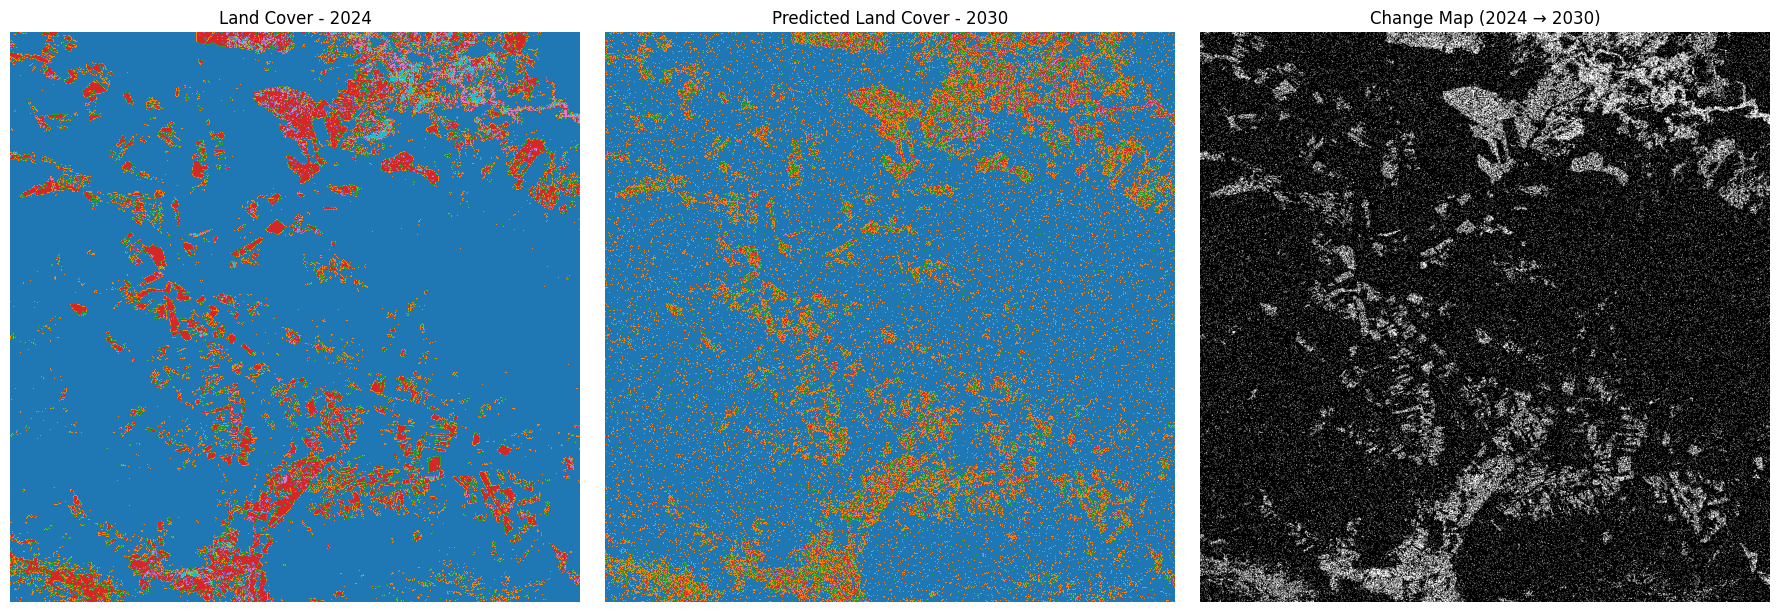

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import confusion_matrix

# ---------------------------
# ÿ™ŸÜÿ∏€åŸÖÿßÿ™
# ---------------------------
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [1990, 2000, 2009, 2020, 2024]
classes = [0, 1, 2, 3]
class_names = ["Urban", "Vegetation", "Agriculture", "Forest"]
class_colors = ["gray", "green", "gold", "darkgreen"]

# ---------------------------
# ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ŸÜŸÇÿ¥Ÿá‚ÄåŸáÿß€å 5 ÿ≥ÿßŸÑŸá
# ---------------------------
rasters = {}
nodatas = {}

for year in years:
    path = os.path.join(base_path, f"classified{year}.tif")
    with rasterio.open(path) as src:
        rasters[year] = src.read(1)
        nodatas[year] = src.nodata
        if year == 2024:
            meta = src.meta.copy()

# ---------------------------
# ÿ≥ÿßÿÆÿ™ ŸÖÿßÿ™ÿ±€åÿ≥ ⁄Øÿ∞ÿßÿ± ŸÖÿßÿ±⁄©ŸàŸÅ ÿßÿ≤ 5 ÿ®ÿßÿ≤Ÿá ÿ≤ŸÖÿßŸÜ€å
# ---------------------------
all_early = []
all_late = []

for i in range(len(years) - 1):
    early = rasters[years[i]]
    late = rasters[years[i + 1]]
    mask = (early != nodatas[years[i]]) & (late != nodatas[years[i + 1]])
    all_early.extend(early[mask].flatten())
    all_late.extend(late[mask].flatten())

trans_matrix = confusion_matrix(all_early, all_late, labels=classes)
trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)

# ---------------------------
# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÜŸÇÿ¥Ÿá 2030 ÿ®ÿß ŸÖÿØŸÑ ŸÖÿßÿ±⁄©ŸàŸÅ
# ---------------------------
np.random.seed(42)
map_2024 = rasters[2024]
rows, cols = map_2024.shape
map_2030 = np.zeros_like(map_2024, dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        c = map_2024[i, j]
        if c in classes:
            map_2030[i, j] = np.random.choice(classes, p=trans_prob[c])
        else:
            map_2030[i, j] = 255  # nodata €åÿß ⁄©ŸÑÿßÿ≥ ŸÜÿßŸÖÿ¥ÿÆÿµ

# ---------------------------
# ÿ∞ÿÆ€åÿ±Ÿá ŸÜŸÇÿ¥Ÿá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚Äåÿ¥ÿØŸá 2030
# ---------------------------
meta.update({"dtype": "uint8", "count": 1})
out_path = os.path.join(base_path, "classified2030.tif")

with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(map_2030, 1)

# ---------------------------
# ÿ™ÿ≠ŸÑ€åŸÑ ÿ¢ŸÖÿßÿ±€å Ÿà ÿ™ÿµŸà€åÿ±€å ÿ™ÿ∫€å€åÿ±ÿßÿ™
# ---------------------------
def class_stats(data, classes):
    unique, counts = np.unique(data, return_counts=True)
    stats = dict(zip(unique, counts))
    return [stats.get(c, 0) for c in classes]

c_2024 = class_stats(map_2024, classes)
c_2030 = class_stats(map_2030, classes)
change_map = np.where(map_2024 != map_2030, 1, 0)
changed_pixels = np.sum(change_map)
total_pixels = map_2024.size

# ÿ¨ÿØŸàŸÑ ÿ™ÿ∫€å€åÿ±ÿßÿ™
df = pd.DataFrame({
    "Class": class_names,
    "Pixels_2024": c_2024,
    "Pixels_2030": c_2030,
    "Change (%)": [((c_2030[i] - c_2024[i]) / c_2024[i] * 100 if c_2024[i] else 0) for i in range(len(classes))]
})
print("\nüìä Change Statistics:\n")
print(df)
print(f"\nüåÄ Total changed pixels: {changed_pixels} ({(changed_pixels / total_pixels) * 100:.2f}%)")

# ---------------------------
# ÿ±ÿ≥ŸÖ ŸÜŸÇÿ¥Ÿá‚ÄåŸáÿß Ÿà ÿ™ÿ∫€å€åÿ±ÿßÿ™
# ---------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(map_2024, cmap="tab10")
axs[0].set_title("Land Cover - 2024")
axs[0].axis("off")

axs[1].imshow(map_2030, cmap="tab10")
axs[1].set_title("Predicted Land Cover - 2030")
axs[1].axis("off")

axs[2].imshow(change_map, cmap="gray")
axs[2].set_title("Change Map (2024 ‚Üí 2030)")
axs[2].axis("off")

plt.tight_layout()
plt.show()



üìä Change Statistics (LCM 2020 ‚Üí 2030):

         Class  Pixels_2020  Pixels_2030  Change (%)
0        Urban      1079173      1069904   -0.858898
1   Vegetation       129310       139273    7.704741
2  Agriculture        13791        12003  -12.964977
3       Forest        20951        22045    5.221708

üåÄ Total changed pixels: 196428 (15.80%)


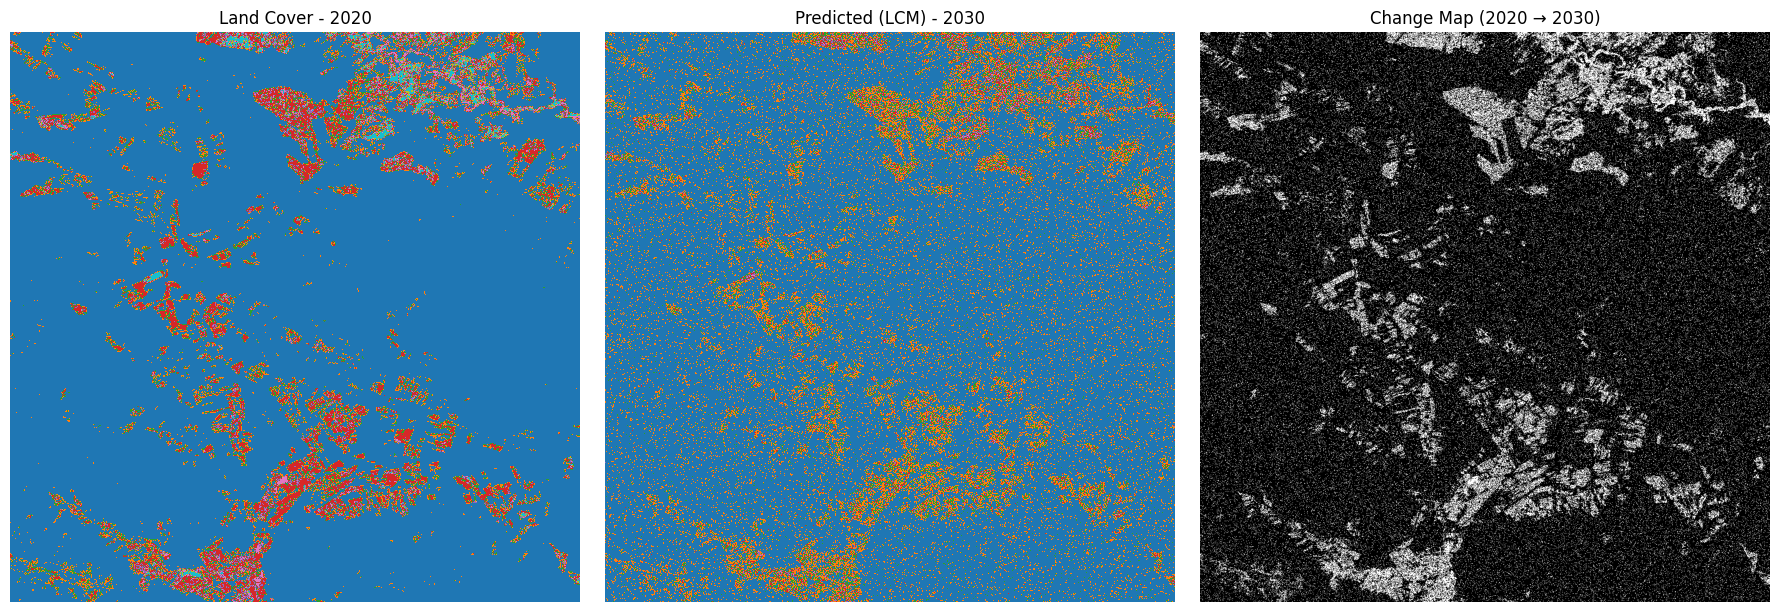

In [18]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import confusion_matrix

# ---------------------------
# ÿ™ŸÜÿ∏€åŸÖÿßÿ™
# ---------------------------
base_path = r"E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW04_sarhadifaraz_spring2025\classified"
years = [2000, 2020]  # ŸÅŸÇÿ∑ ÿØŸà ÿ≥ÿßŸÑ ÿ®ÿ±ÿß€å LCM
classes = [0, 1, 2, 3]
class_names = ["Urban", "Vegetation", "Agriculture", "Forest"]
class_colors = ["gray", "green", "gold", "darkgreen"]

# ---------------------------
# ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØŸà ŸÜŸÇÿ¥Ÿá LCM
# ---------------------------
rasters = {}
nodatas = {}

for year in years:
    path = os.path.join(base_path, f"classified{year}.tif")
    with rasterio.open(path) as src:
        rasters[year] = src.read(1)
        nodatas[year] = src.nodata
        if year == 2020:
            meta = src.meta.copy()

# ---------------------------
# ÿ≥ÿßÿÆÿ™ ŸÖÿßÿ™ÿ±€åÿ≥ ⁄Øÿ∞ÿßÿ± LCM
# ---------------------------
early = rasters[2000]
late = rasters[2020]
mask = (early != nodatas[2000]) & (late != nodatas[2020])
early_flat = early[mask].flatten()
late_flat = late[mask].flatten()

trans_matrix = confusion_matrix(early_flat, late_flat, labels=classes)
trans_prob = trans_matrix.astype(float) / trans_matrix.sum(axis=1, keepdims=True)

# ---------------------------
# ÿ¥ÿ®€åŸá‚Äåÿ≥ÿßÿ≤€å ŸÜŸÇÿ¥Ÿá 2030 ÿ®ÿß ŸÖÿØŸÑ LCM
# ---------------------------
np.random.seed(42)
map_2020 = rasters[2020]
rows, cols = map_2020.shape
map_2030 = np.zeros_like(map_2020, dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        c = map_2020[i, j]
        if c in classes:
            map_2030[i, j] = np.random.choice(classes, p=trans_prob[c])
        else:
            map_2030[i, j] = 255  # nodata

# ---------------------------
# ÿ∞ÿÆ€åÿ±Ÿá ŸÜŸÇÿ¥Ÿá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚Äåÿ¥ÿØŸá 2030 (LCM)
# ---------------------------
meta.update({"dtype": "uint8", "count": 1})
out_path = os.path.join(base_path, "classified2030_LCM.tif")

with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(map_2030, 1)

# ---------------------------
# ÿ™ÿ≠ŸÑ€åŸÑ ÿ¢ŸÖÿßÿ±€å Ÿà ÿ®ÿµÿ±€å ÿ™ÿ∫€å€åÿ±ÿßÿ™ (2020 vs 2030)
# ---------------------------
def class_stats(data, classes):
    unique, counts = np.unique(data, return_counts=True)
    stats = dict(zip(unique, counts))
    return [stats.get(c, 0) for c in classes]

c_2020 = class_stats(map_2020, classes)
c_2030 = class_stats(map_2030, classes)
change_map = np.where(map_2020 != map_2030, 1, 0)
changed_pixels = np.sum(change_map)
total_pixels = map_2020.size

df = pd.DataFrame({
    "Class": class_names,
    "Pixels_2020": c_2020,
    "Pixels_2030": c_2030,
    "Change (%)": [((c_2030[i] - c_2020[i]) / c_2020[i] * 100 if c_2020[i] else 0) for i in range(len(classes))]
})
print("\nüìä Change Statistics (LCM 2020 ‚Üí 2030):\n")
print(df)
print(f"\nüåÄ Total changed pixels: {changed_pixels} ({(changed_pixels / total_pixels) * 100:.2f}%)")

# ---------------------------
# ÿ±ÿ≥ŸÖ ŸÜŸÇÿ¥Ÿá‚ÄåŸáÿß Ÿà ÿ™ÿ∫€å€åÿ±ÿßÿ™
# ---------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(map_2020, cmap="tab10")
axs[0].set_title("Land Cover - 2020")
axs[0].axis("off")

axs[1].imshow(map_2030, cmap="tab10")
axs[1].set_title("Predicted (LCM) - 2030")
axs[1].axis("off")

axs[2].imshow(change_map, cmap="gray")
axs[2].set_title("Change Map (2020 ‚Üí 2030)")
axs[2].axis("off")

plt.tight_layout()
plt.show()
